In [1]:
import sys
mainpath='c:/Kitti/Dropbox/PHD/Gridshells-EQCS' #location of folders
sys.path.insert(0, mainpath+'/Tekno') #location of python files

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import Tekno as tk
import Types as tp
import numpy as np
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import pandas as pd

In [3]:
import importlib #for reloading
importlib.reload(tk)
import Tekno as tk

# Parameters

materially and geometrically linear finite element analysis to determine internal forces

grid shells with various span (L) and pipe cross-section sizes (D, T)

to see results either load previously calculated and saved results or run analyses

In [5]:
gN     = 16  # number of triangles along each span  
nb     = 4   # number of finite elements along one beam

# Load

In [6]:
with pd.HDFStore(mainpath+'/Saved results/Lin_L.h5') as store:
    Nmax = store['Nmax'].values
    Nmax2 = store['Nmax2'].values
    Mmax = store['Mmax'].values
    Mmax2 = store['Mmax2'].values
    Nmin = store['Nmin'].values
    Nmin2 = store['Nmin2'].values
    Mmin = store['Mmin'].values
    Mmin2 = store['Mmin2'].values
    rhoA = store['rhoA'].values

# Analysis

In [ ]:
n=3 # mm CHS cross-section diameter
DStart=150
DStep=50
m=3 # mm CHS cross-section thickness
tStart=5
tStep=5
print('D: ',np.arange(DStart,DStart+n*DStep,DStep))
print('t: ',np.arange(tStart,tStart+m*tStep,tStep))
qz = 1.; #kN/m2
MatNL = False
GeomNL = 0
Steps = 2

Nmax  = np.zeros((2, n*m))
Nmax2 = np.zeros((2, n*m))
Mmax  = np.zeros((2, n*m))
Mmax2 = np.zeros((2, n*m))
Nmin  = np.zeros((2, n*m))
Nmin2 = np.zeros((2, n*m))
Mmin  = np.zeros((2, n*m))
Mmin2 = np.zeros((2, n*m))
rhoA  = np.zeros((2, n*m))

i = 0
spanA = [20,40]
for ss in spanA:
    for pp in [8]:  
        Span   = ss  # m span of two-member structure
        LperH = pp
        Height = Span/LperH   # m height at apex
        IO = tp.IterObj(Span, Height, gN, nb, 'q', qz, MatNL, GeomNL, Steps, n, m, DStart, DStep, tStart, tStep)
        Nmin[i], Nmax[i], Mmax[i], rhoA[i], Nmin2[i], Nmax2[i], Mmax2[i], _, _, _, _, _ = tk.Eval(IO)
        i+=1

# Results

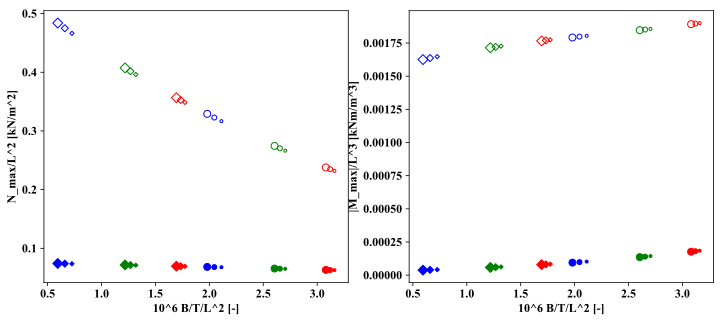

In [7]:
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 2)
sms = 5

ax1 = plt.subplot(gs[0, 0])
plt.xlabel('10^6 B/T/L^2 [-]')
plt.ylabel('N_max/L^2 [kN/m^2]')

plt.plot(np.log(rhoA[0,0]*1e6),Nmax[0,0]/20**2,'bo', ms=3) # D=150, t=5
plt.plot(np.log(rhoA[0,1]*1e6),Nmax[0,1]/20**2,'bo', ms=5) #        t=10
plt.plot(np.log(rhoA[0,2]*1e6),Nmax[0,2]/20**2,'bo', ms=7) #        t=15
plt.plot(np.log(rhoA[0,3]*1e6),Nmax[0,3]/20**2,'go', ms=3) # D=200, t=5
plt.plot(np.log(rhoA[0,4]*1e6),Nmax[0,4]/20**2,'go', ms=5) #        t=10
plt.plot(np.log(rhoA[0,5]*1e6),Nmax[0,5]/20**2,'go', ms=7) #        t=15
plt.plot(np.log(rhoA[0,6]*1e6),Nmax[0,6]/20**2,'o',c='r', ms=3) # D=250, t=5
plt.plot(np.log(rhoA[0,7]*1e6),Nmax[0,7]/20**2,'o',c='r', ms=5) #        t=10
plt.plot(np.log(rhoA[0,8]*1e6),Nmax[0,8]/20**2,'o',c='r', ms=7) #        t=15

plt.plot(np.log(rhoA[1,0]*1e6),Nmax[1,0]/40**2,'bD', ms=3) #L=40
plt.plot(np.log(rhoA[1,1]*1e6),Nmax[1,1]/40**2,'bD', ms=5)
plt.plot(np.log(rhoA[1,2]*1e6),Nmax[1,2]/40**2,'bD', ms=7)
plt.plot(np.log(rhoA[1,3]*1e6),Nmax[1,3]/40**2,'gD', ms=3)
plt.plot(np.log(rhoA[1,4]*1e6),Nmax[1,4]/40**2,'gD', ms=5)
plt.plot(np.log(rhoA[1,5]*1e6),Nmax[1,5]/40**2,'gD', ms=7)
plt.plot(np.log(rhoA[1,6]*1e6),Nmax[1,6]/40**2,'rD', ms=3)
plt.plot(np.log(rhoA[1,7]*1e6),Nmax[1,7]/40**2,'rD', ms=5)
plt.plot(np.log(rhoA[1,8]*1e6),Nmax[1,8]/40**2,'rD', ms=7)

plt.plot(np.log(rhoA[0,0]*1e6),Nmax2[0,0]/20**2,'bo',fillStyle='none', ms=3) # D=150, t=5
plt.plot(np.log(rhoA[0,1]*1e6),Nmax2[0,1]/20**2,'bo',fillStyle='none', ms=5) #        t=10
plt.plot(np.log(rhoA[0,2]*1e6),Nmax2[0,2]/20**2,'bo',fillStyle='none', ms=7) #        t=15
plt.plot(np.log(rhoA[0,3]*1e6),Nmax2[0,3]/20**2,'go',fillStyle='none', ms=3) # D=200, t=5
plt.plot(np.log(rhoA[0,4]*1e6),Nmax2[0,4]/20**2,'go',fillStyle='none', ms=5) #        t=10
plt.plot(np.log(rhoA[0,5]*1e6),Nmax2[0,5]/20**2,'go',fillStyle='none', ms=7) #        t=15
plt.plot(np.log(rhoA[0,6]*1e6),Nmax2[0,6]/20**2,'ro',fillStyle='none', ms=3) # D=250, t=5
plt.plot(np.log(rhoA[0,7]*1e6),Nmax2[0,7]/20**2,'ro',fillStyle='none', ms=5) #        t=10
plt.plot(np.log(rhoA[0,8]*1e6),Nmax2[0,8]/20**2,'ro',fillStyle='none', ms=7) #        t=15

plt.plot(np.log(rhoA[1,0]*1e6),Nmax2[1,0]/40**2,'bD',fillStyle='none', ms=3) #L=40
plt.plot(np.log(rhoA[1,1]*1e6),Nmax2[1,1]/40**2,'bD',fillStyle='none', ms=5)
plt.plot(np.log(rhoA[1,2]*1e6),Nmax2[1,2]/40**2,'bD',fillStyle='none', ms=7)
plt.plot(np.log(rhoA[1,3]*1e6),Nmax2[1,3]/40**2,'gD',fillStyle='none', ms=3)
plt.plot(np.log(rhoA[1,4]*1e6),Nmax2[1,4]/40**2,'gD',fillStyle='none', ms=5)
plt.plot(np.log(rhoA[1,5]*1e6),Nmax2[1,5]/40**2,'gD',fillStyle='none', ms=7)
plt.plot(np.log(rhoA[1,6]*1e6),Nmax2[1,6]/40**2,'rD',fillStyle='none', ms=3)
plt.plot(np.log(rhoA[1,7]*1e6),Nmax2[1,7]/40**2,'rD',fillStyle='none', ms=5)
plt.plot(np.log(rhoA[1,8]*1e6),Nmax2[1,8]/40**2,'rD',fillStyle='none', ms=7)

ax2 = plt.subplot(gs[0, 1])    
plt.xlabel('10^6 B/T/L^2 [-]')
plt.ylabel('|M_max|/L^3 [kNm/m^3]')

plt.plot(np.log(rhoA[0,0]*1e6),Mmax[0,0]/20**3,'bo', ms=3) # D=150, t=5
plt.plot(np.log(rhoA[0,1]*1e6),Mmax[0,1]/20**3,'bo', ms=5) #        t=10
plt.plot(np.log(rhoA[0,2]*1e6),Mmax[0,2]/20**3,'bo', ms=7) #        t=15
plt.plot(np.log(rhoA[0,3]*1e6),Mmax[0,3]/20**3,'go', ms=3) # D=200, t=5
plt.plot(np.log(rhoA[0,4]*1e6),Mmax[0,4]/20**3,'go', ms=5) #        t=10
plt.plot(np.log(rhoA[0,5]*1e6),Mmax[0,5]/20**3,'go', ms=7) #        t=15
plt.plot(np.log(rhoA[0,6]*1e6),Mmax[0,6]/20**3,'o',c='r', ms=3) # D=250, t=5
plt.plot(np.log(rhoA[0,7]*1e6),Mmax[0,7]/20**3,'o',c='r', ms=5) #        t=10
plt.plot(np.log(rhoA[0,8]*1e6),Mmax[0,8]/20**3,'o',c='r', ms=7) #        t=15

plt.plot(np.log(rhoA[1,0]*1e6),Mmax[1,0]/40**3,'bD', ms=3) #H=40
plt.plot(np.log(rhoA[1,1]*1e6),Mmax[1,1]/40**3,'bD', ms=5)
plt.plot(np.log(rhoA[1,2]*1e6),Mmax[1,2]/40**3,'bD', ms=7)
plt.plot(np.log(rhoA[1,3]*1e6),Mmax[1,3]/40**3,'gD', ms=3)
plt.plot(np.log(rhoA[1,4]*1e6),Mmax[1,4]/40**3,'gD', ms=5)
plt.plot(np.log(rhoA[1,5]*1e6),Mmax[1,5]/40**3,'gD', ms=7)
plt.plot(np.log(rhoA[1,6]*1e6),Mmax[1,6]/40**3,'rD', ms=3)
plt.plot(np.log(rhoA[1,7]*1e6),Mmax[1,7]/40**3,'rD', ms=5)
plt.plot(np.log(rhoA[1,8]*1e6),Mmax[1,8]/40**3,'rD', ms=7)

plt.plot(np.log(rhoA[0,0]*1e6),Mmax2[0,0]/20**3,'bo',fillStyle='none', ms=3) # D=150, t=5
plt.plot(np.log(rhoA[0,1]*1e6),Mmax2[0,1]/20**3,'bo',fillStyle='none', ms=5) #        t=10
plt.plot(np.log(rhoA[0,2]*1e6),Mmax2[0,2]/20**3,'bo',fillStyle='none', ms=7) #        t=15
plt.plot(np.log(rhoA[0,3]*1e6),Mmax2[0,3]/20**3,'go',fillStyle='none', ms=3) # D=200, t=5
plt.plot(np.log(rhoA[0,4]*1e6),Mmax2[0,4]/20**3,'go',fillStyle='none', ms=5) #        t=10
plt.plot(np.log(rhoA[0,5]*1e6),Mmax2[0,5]/20**3,'go',fillStyle='none', ms=7) #        t=15
plt.plot(np.log(rhoA[0,6]*1e6),Mmax2[0,6]/20**3,'o',fillStyle='none',c='r', ms=3) # D=250, t=5
plt.plot(np.log(rhoA[0,7]*1e6),Mmax2[0,7]/20**3,'o',fillStyle='none',c='r', ms=5) #        t=10
plt.plot(np.log(rhoA[0,8]*1e6),Mmax2[0,8]/20**3,'o',fillStyle='none',c='r', ms=7) #        t=15

plt.plot(np.log(rhoA[1,0]*1e6),Mmax2[1,0]/40**3,'bD',fillStyle='none', ms=3) #H=40
plt.plot(np.log(rhoA[1,1]*1e6),Mmax2[1,1]/40**3,'bD',fillStyle='none', ms=5)
plt.plot(np.log(rhoA[1,2]*1e6),Mmax2[1,2]/40**3,'bD',fillStyle='none', ms=7)
plt.plot(np.log(rhoA[1,3]*1e6),Mmax2[1,3]/40**3,'gD',fillStyle='none', ms=3)
plt.plot(np.log(rhoA[1,4]*1e6),Mmax2[1,4]/40**3,'gD',fillStyle='none', ms=5)
plt.plot(np.log(rhoA[1,5]*1e6),Mmax2[1,5]/40**3,'gD',fillStyle='none', ms=7)
plt.plot(np.log(rhoA[1,6]*1e6),Mmax2[1,6]/40**3,'rD',fillStyle='none', ms=3)
plt.plot(np.log(rhoA[1,7]*1e6),Mmax2[1,7]/40**3,'rD',fillStyle='none', ms=5)
plt.plot(np.log(rhoA[1,8]*1e6),Mmax2[1,8]/40**3,'rD',fillStyle='none', ms=7)
    
plt.show()

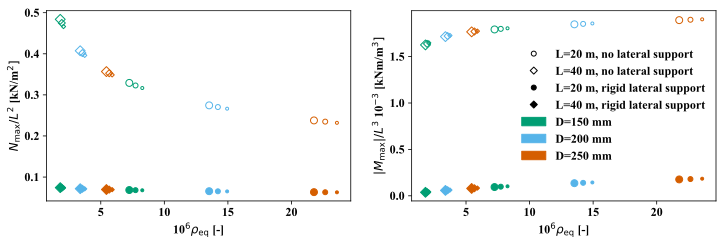

In [8]:
fig = plt.figure(figsize=(12, 3.5))
gs = gridspec.GridSpec(1, 2)
sms = 5
c1=[c/255. for c in [213., 94., 0.]] # vermillion
c2=[c/255. for c in [86, 180, 233]] # sky blue
c3=[c/255. for c in [0, 158, 115]] # bluish green

ax1 = plt.subplot(gs[0, 0])
plt.xlabel('10$^6\\rho_{\\rm eq}$ [-]')
plt.ylabel('$N_{\\rm max}/L^2$ [kN/m$^2]$')
plt.plot(rhoA[0,0]*1e6,Nmax[0,0]/20**2,'o',c=c3, ms=3) # D=150, t=5
plt.plot(rhoA[0,1]*1e6,Nmax[0,1]/20**2,'o',c=c3, ms=5) #        t=10
l1=plt.plot(rhoA[0,2]*1e6,Nmax[0,2]/20**2,'o',c=c3, ms=7) #        t=15
plt.plot(rhoA[0,3]*1e6,Nmax[0,3]/20**2,'o',c=c2, ms=3) # D=200, t=5
plt.plot(rhoA[0,4]*1e6,Nmax[0,4]/20**2,'o',c=c2, ms=5) #        t=10
plt.plot(rhoA[0,5]*1e6,Nmax[0,5]/20**2,'o',c=c2, ms=7) #        t=15
plt.plot(rhoA[0,6]*1e6,Nmax[0,6]/20**2,'o',c=c1, ms=3) # D=250, t=5
plt.plot(rhoA[0,7]*1e6,Nmax[0,7]/20**2,'o',c=c1, ms=5) #        t=10
plt.plot(rhoA[0,8]*1e6,Nmax[0,8]/20**2,'o',c=c1, ms=7) #        t=15

plt.plot(rhoA[1,0]*1e6,Nmax[1,0]/40**2,'D',c=c3, ms=3) #L=40
plt.plot(rhoA[1,1]*1e6,Nmax[1,1]/40**2,'D',c=c3, ms=5)
plt.plot(rhoA[1,2]*1e6,Nmax[1,2]/40**2,'D',c=c3, ms=7)
plt.plot(rhoA[1,3]*1e6,Nmax[1,3]/40**2,'D',c=c2, ms=3)
plt.plot(rhoA[1,4]*1e6,Nmax[1,4]/40**2,'D',c=c2, ms=5)
plt.plot(rhoA[1,5]*1e6,Nmax[1,5]/40**2,'D',c=c2, ms=7)
plt.plot(rhoA[1,6]*1e6,Nmax[1,6]/40**2,'D',c=c1, ms=3)
plt.plot(rhoA[1,7]*1e6,Nmax[1,7]/40**2,'D',c=c1, ms=5)
plt.plot(rhoA[1,8]*1e6,Nmax[1,8]/40**2,'D',c=c1, ms=7)

plt.plot(rhoA[0,0]*1e6,Nmax2[0,0]/20**2,'o',c=c3,fillStyle='none', ms=3) # D=150, t=5
plt.plot(rhoA[0,1]*1e6,Nmax2[0,1]/20**2,'o',c=c3,fillStyle='none', ms=5) #        t=10
plt.plot(rhoA[0,2]*1e6,Nmax2[0,2]/20**2,'o',c=c3,fillStyle='none', ms=7) #        t=15
plt.plot(rhoA[0,3]*1e6,Nmax2[0,3]/20**2,'o',c=c2,fillStyle='none', ms=3) # D=200, t=5
plt.plot(rhoA[0,4]*1e6,Nmax2[0,4]/20**2,'o',c=c2,fillStyle='none', ms=5) #        t=10
plt.plot(rhoA[0,5]*1e6,Nmax2[0,5]/20**2,'o',c=c2,fillStyle='none', ms=7) #        t=15
plt.plot(rhoA[0,6]*1e6,Nmax2[0,6]/20**2,'o',c=c1,fillStyle='none', ms=3) # D=250, t=5
plt.plot(rhoA[0,7]*1e6,Nmax2[0,7]/20**2,'o',c=c1,fillStyle='none', ms=5) #        t=10
plt.plot(rhoA[0,8]*1e6,Nmax2[0,8]/20**2,'o',c=c1,fillStyle='none', ms=7) #        t=15

plt.plot(rhoA[1,0]*1e6,Nmax2[1,0]/40**2,'D',c=c3,fillStyle='none', ms=3) #L=40
plt.plot(rhoA[1,1]*1e6,Nmax2[1,1]/40**2,'D',c=c3,fillStyle='none', ms=5)
plt.plot(rhoA[1,2]*1e6,Nmax2[1,2]/40**2,'D',c=c3,fillStyle='none', ms=7)
plt.plot(rhoA[1,3]*1e6,Nmax2[1,3]/40**2,'D',c=c2,fillStyle='none', ms=3)
plt.plot(rhoA[1,4]*1e6,Nmax2[1,4]/40**2,'D',c=c2,fillStyle='none', ms=5)
plt.plot(rhoA[1,5]*1e6,Nmax2[1,5]/40**2,'D',c=c2,fillStyle='none', ms=7)
plt.plot(rhoA[1,6]*1e6,Nmax2[1,6]/40**2,'D',c=c1,fillStyle='none', ms=3)
plt.plot(rhoA[1,7]*1e6,Nmax2[1,7]/40**2,'D',c=c1,fillStyle='none', ms=5)
plt.plot(rhoA[1,8]*1e6,Nmax2[1,8]/40**2,'D',c=c1,fillStyle='none', ms=7)



ax2 = plt.subplot(gs[0, 1]) 
plt.xlabel('10$^6\\rho_{\\rm eq}$ [-]')
plt.ylabel('$|M_{\\rm max}|/L^3$ 10$^{-3}$ [kNm/m$^3]$')

plt.plot(rhoA[0,0]*1e6,Mmax[0,0]/20**3*1e3,'o',c=c3, ms=3) # D=150, t=5
plt.plot(rhoA[0,1]*1e6,Mmax[0,1]/20**3*1e3,'o',c=c3, ms=5) #        t=10
plt.plot(rhoA[0,2]*1e6,Mmax[0,2]/20**3*1e3,'o',c=c3, ms=7) #        t=15
plt.plot(rhoA[0,3]*1e6,Mmax[0,3]/20**3*1e3,'o',c=c2, ms=3) # D=200, t=5
plt.plot(rhoA[0,4]*1e6,Mmax[0,4]/20**3*1e3,'o',c=c2, ms=5) #        t=10
plt.plot(rhoA[0,5]*1e6,Mmax[0,5]/20**3*1e3,'o',c=c2, ms=7) #        t=15
plt.plot(rhoA[0,6]*1e6,Mmax[0,6]/20**3*1e3,'o',c=c1, ms=3) # D=250, t=5
plt.plot(rhoA[0,7]*1e6,Mmax[0,7]/20**3*1e3,'o',c=c1, ms=5) #        t=10
plt.plot(rhoA[0,8]*1e6,Mmax[0,8]/20**3*1e3,'o',c=c1, ms=7) #        t=15

plt.plot(rhoA[1,0]*1e6,Mmax[1,0]/40**3*1e3,'bD',c=c3, ms=3) #H=40
plt.plot(rhoA[1,1]*1e6,Mmax[1,1]/40**3*1e3,'bD',c=c3, ms=5)
plt.plot(rhoA[1,2]*1e6,Mmax[1,2]/40**3*1e3,'bD',c=c3, ms=7)
plt.plot(rhoA[1,3]*1e6,Mmax[1,3]/40**3*1e3,'gD',c=c2, ms=3)
plt.plot(rhoA[1,4]*1e6,Mmax[1,4]/40**3*1e3,'gD',c=c2, ms=5)
plt.plot(rhoA[1,5]*1e6,Mmax[1,5]/40**3*1e3,'gD',c=c2, ms=7)
plt.plot(rhoA[1,6]*1e6,Mmax[1,6]/40**3*1e3,'rD',c=c1, ms=3)
plt.plot(rhoA[1,7]*1e6,Mmax[1,7]/40**3*1e3,'rD',c=c1, ms=5)
plt.plot(rhoA[1,8]*1e6,Mmax[1,8]/40**3*1e3,'rD',c=c1, ms=7)

plt.plot(rhoA[0,0]*1e6,Mmax2[0,0]/20**3*1e3,'bo',c=c3,fillStyle='none', ms=3) # D=150, t=5
plt.plot(rhoA[0,1]*1e6,Mmax2[0,1]/20**3*1e3,'bo',c=c3,fillStyle='none', ms=5) #        t=10
plt.plot(rhoA[0,2]*1e6,Mmax2[0,2]/20**3*1e3,'bo',c=c3,fillStyle='none', ms=7) #        t=15
plt.plot(rhoA[0,3]*1e6,Mmax2[0,3]/20**3*1e3,'go',c=c2,fillStyle='none', ms=3) # D=200, t=5
plt.plot(rhoA[0,4]*1e6,Mmax2[0,4]/20**3*1e3,'go',c=c2,fillStyle='none', ms=5) #        t=10
plt.plot(rhoA[0,5]*1e6,Mmax2[0,5]/20**3*1e3,'go',c=c2,fillStyle='none', ms=7) #        t=15
plt.plot(rhoA[0,6]*1e6,Mmax2[0,6]/20**3*1e3,'o',c=c1,fillStyle='none', ms=3) # D=250, t=5
plt.plot(rhoA[0,7]*1e6,Mmax2[0,7]/20**3*1e3,'o',c=c1,fillStyle='none', ms=5) #        t=10
plt.plot(rhoA[0,8]*1e6,Mmax2[0,8]/20**3*1e3,'o',c=c1,fillStyle='none', ms=7) #        t=15

plt.plot(rhoA[1,0]*1e6,Mmax2[1,0]/40**3*1e3,'bD',c=c3,fillStyle='none', ms=3) #H=40
plt.plot(rhoA[1,1]*1e6,Mmax2[1,1]/40**3*1e3,'bD',c=c3,fillStyle='none', ms=5)
plt.plot(rhoA[1,2]*1e6,Mmax2[1,2]/40**3*1e3,'bD',c=c3,fillStyle='none', ms=7)
plt.plot(rhoA[1,3]*1e6,Mmax2[1,3]/40**3*1e3,'gD',c=c2,fillStyle='none', ms=3)
plt.plot(rhoA[1,4]*1e6,Mmax2[1,4]/40**3*1e3,'gD',c=c2,fillStyle='none', ms=5)
plt.plot(rhoA[1,5]*1e6,Mmax2[1,5]/40**3*1e3,'gD',c=c2,fillStyle='none', ms=7)
plt.plot(rhoA[1,6]*1e6,Mmax2[1,6]/40**3*1e3,'rD',c=c1,fillStyle='none', ms=3)
plt.plot(rhoA[1,7]*1e6,Mmax2[1,7]/40**3*1e3,'rD',c=c1,fillStyle='none', ms=5)
plt.plot(rhoA[1,8]*1e6,Mmax2[1,8]/40**3*1e3,'rD',c=c1,fillStyle='none', ms=7)

o20_dot = mlines.Line2D([], [], color='k', marker='o',markersize=5, label='L=20 m, no lateral support',linestyle='None',fillStyle='none')
o40_dot = mlines.Line2D([], [], color='k', marker='D',markersize=5, label='L=40 m, no lateral support',linestyle='None',fillStyle='none')
om20_dot = mlines.Line2D([], [], color='k', marker='o',markersize=5, label='L=20 m, rigid lateral support',linestyle='None')
om40_dot = mlines.Line2D([], [], color='k', marker='D',markersize=5, label='L=40 m, rigid lateral support',linestyle='None')
blue_patch = mpatches.Patch(color=c3, label='D=150 mm')
green_patch = mpatches.Patch(color=c2, label='D=200 mm')
red_patch = mpatches.Patch(color=c1, label='D=250 mm')
plt.legend(handles=[o20_dot,o40_dot,om20_dot,om40_dot,blue_patch,green_patch,red_patch],frameon=False)

plt.savefig('LinSpan.pdf', bbox_inches='tight')

plt.show()

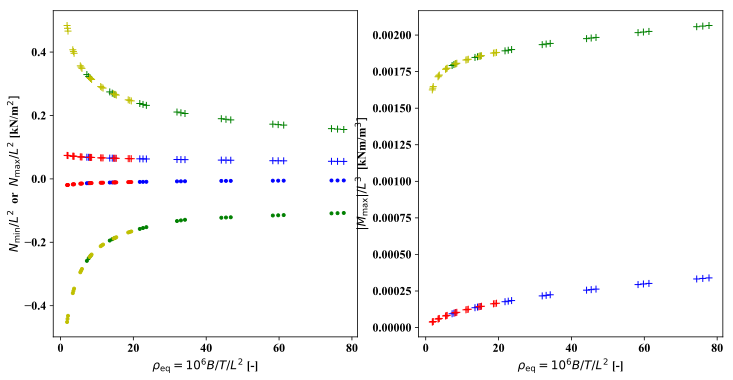

In [10]:
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2)
sms = 5

ax1 = plt.subplot(gs[0, 0])
plt.xlabel('$\\rho_{\\rm eq}=10^6 B/T/L^2$ [-]')
plt.ylabel('$N_{\\rm min}/L^2$  or  $N_{\\rm max}/L^2$ [kN/m$^2]$')
for i in range(21):
    plt.plot(rhoA[0,i]*1e6,Nmin[0,i]/20**2,'bo', ms=3) # 20m
    plt.plot(rhoA[0,i]*1e6,Nmax[0,i]/20**2,'b+', ms=7) # 20m
    plt.plot(rhoA[1,i]*1e6,Nmin[1,i]/40**2,'ro', ms=3) # 40m
    plt.plot(rhoA[1,i]*1e6,Nmax[1,i]/40**2,'r+', ms=7) # 40m
    plt.plot(rhoA[0,i]*1e6,Nmin2[0,i]/20**2,'go', ms=3) # 20m
    plt.plot(rhoA[0,i]*1e6,Nmax2[0,i]/20**2,'g+', ms=7) # 20m
    plt.plot(rhoA[1,i]*1e6,Nmin2[1,i]/40**2,'yo', ms=3) # 40m
    plt.plot(rhoA[1,i]*1e6,Nmax2[1,i]/40**2,'y+', ms=7) # 40m
    
ax2 = plt.subplot(gs[0, 1])    
plt.xlabel('$\\rho_{\\rm eq}=10^6 B/T/L^2$ [-]')
plt.ylabel('$|M_{\\rm max}|/L^3$  [kNm/m$^3]$')
for i in range(21):
    plt.plot(rhoA[0,i]*1e6,Mmax[0,i]/20**3,'b+', ms=7) # 20m
    plt.plot(rhoA[1,i]*1e6,Mmax[1,i]/40**3,'r+', ms=7) # 40m
    plt.plot(rhoA[0,i]*1e6,Mmax2[0,i]/20**3,'g+', ms=7) # 20m
    plt.plot(rhoA[1,i]*1e6,Mmax2[1,i]/40**3,'y+', ms=7) # 40m

# Save

In [11]:
A_df  = pd.DataFrame(Nmax)
B_df  = pd.DataFrame(Nmax2)
C_df  = pd.DataFrame(Mmax)
D_df  = pd.DataFrame(Mmax2)
E_df  = pd.DataFrame(Nmin)
F_df  = pd.DataFrame(Nmin2)
G_df  = pd.DataFrame(Mmin)
H_df  = pd.DataFrame(Mmin2)
I_df = pd.DataFrame(rhoA)

with pd.HDFStore(mainpath+'/Saved results/Lin_L.h5') as store:
    store['Nmax'] = A_df
    store['Nmax2']= B_df
    store['Mmax'] = C_df
    store['Mmax2']= D_df
    store['Nmin'] = E_df
    store['Nmin2']= F_df
    store['Mmin'] = G_df
    store['Mmin2']= H_df
    store['rhoA'] = I_df